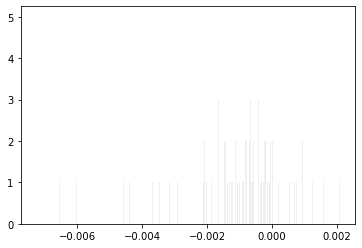

C:\Users\10535\AppData\Local\Temp/ipykernel_17892/2442527800.py:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(centers,prob,'k-',linewidth=2,color='r')


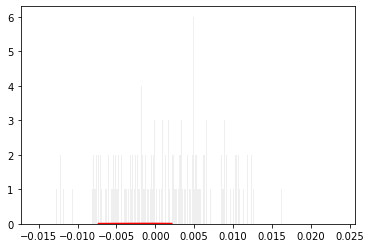

1.0


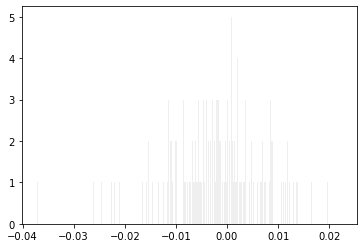

1.0


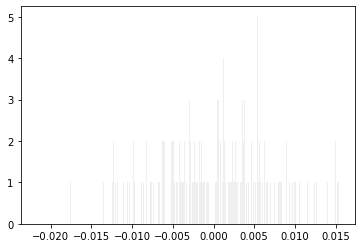

1.0


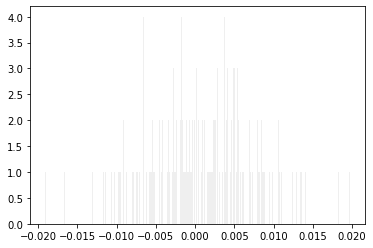

1.0


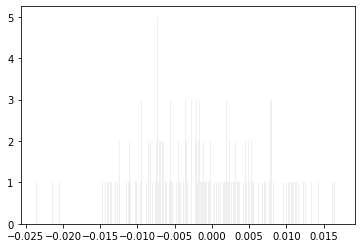

1.0


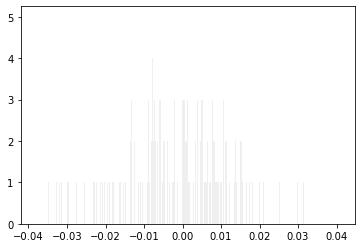

1.0


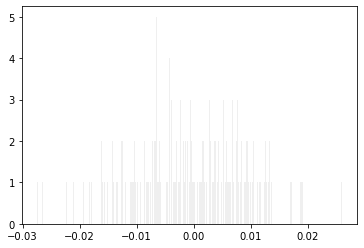

1.0


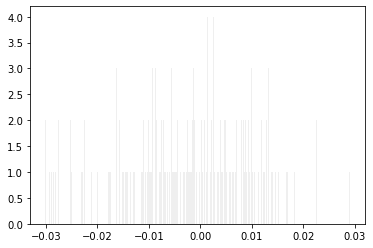

1.0


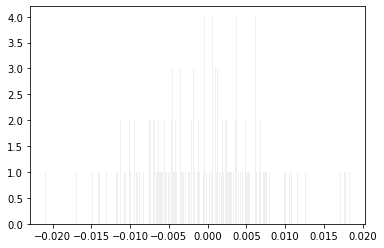

0.9999999999999999


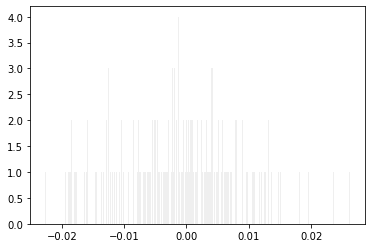

1.0


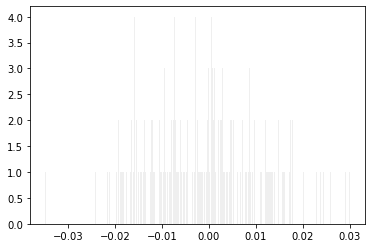

1.0


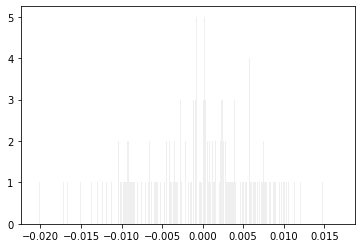

1.0


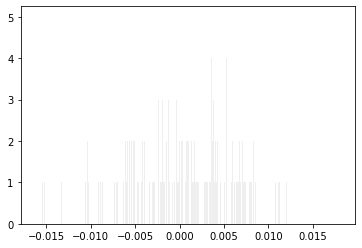

1.0


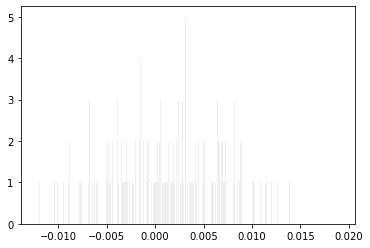

1.0


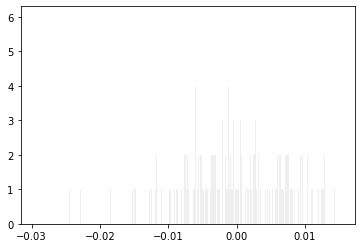

1.0


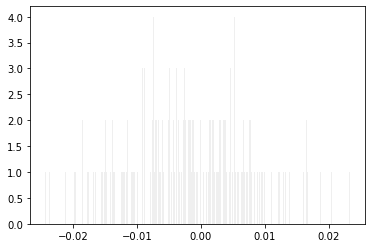

1.0


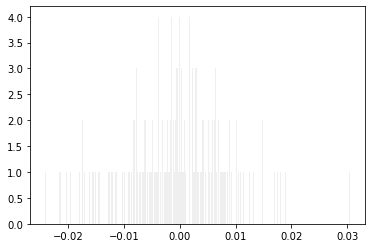

1.0


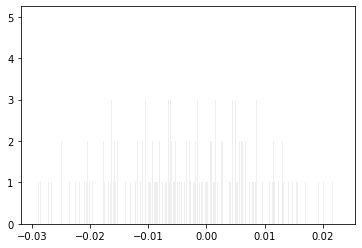

1.0


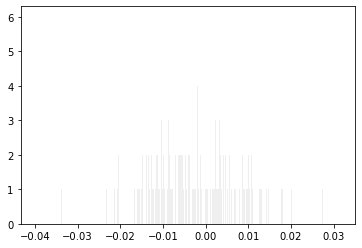

1.0


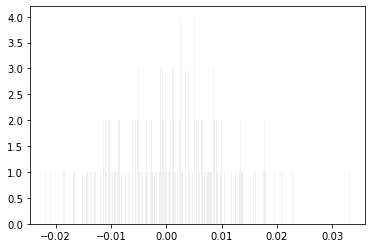

1.0


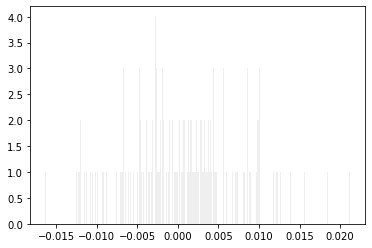

1.0


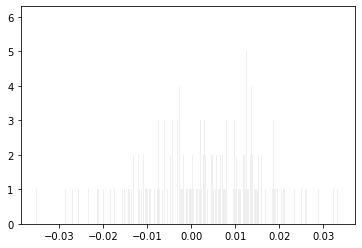

1.0


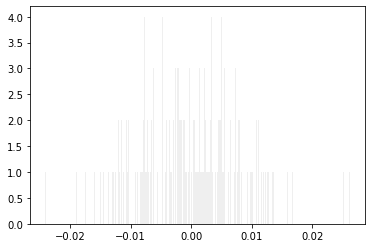

1.0


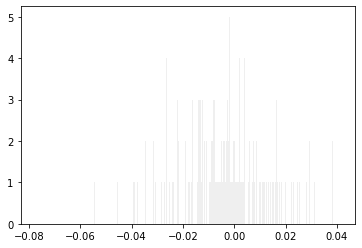

1.0


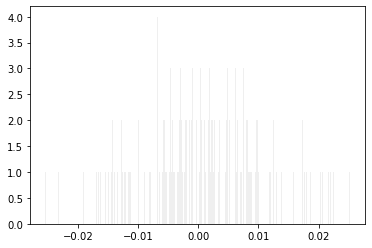

1.0


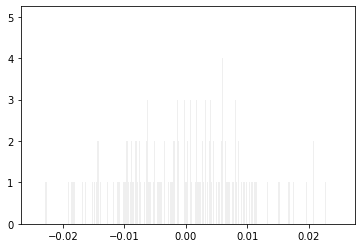

0.9999999999999999


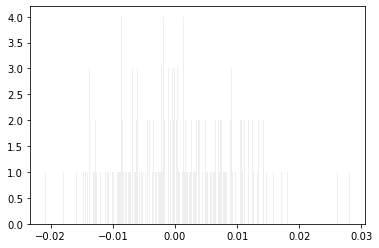

1.0


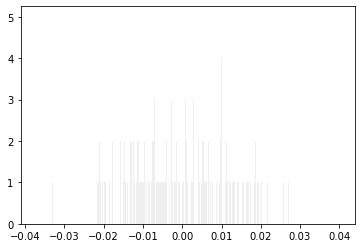

1.0


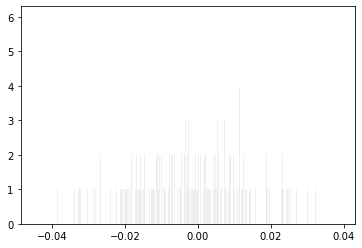

1.0


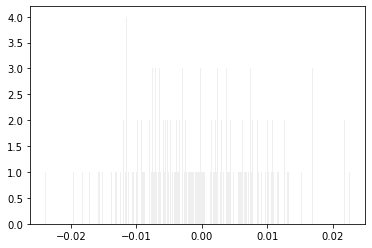

1.0


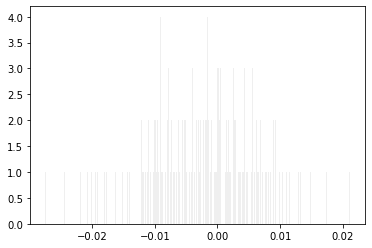

1.0


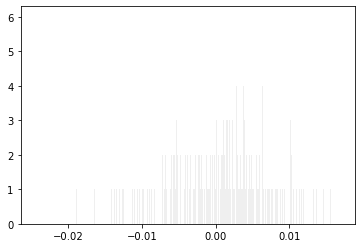

1.0


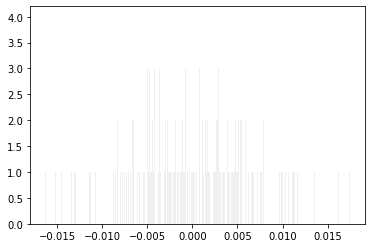

1.0


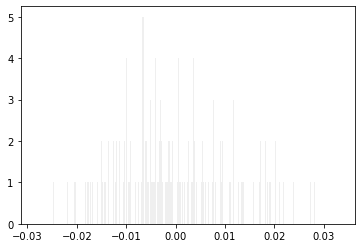

1.0


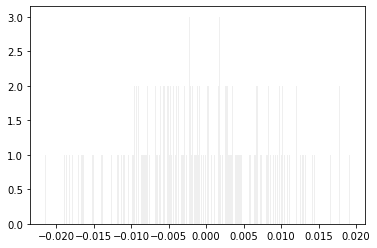

0.9999999999999999


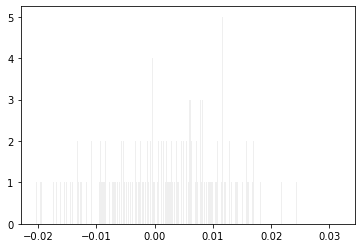

1.0


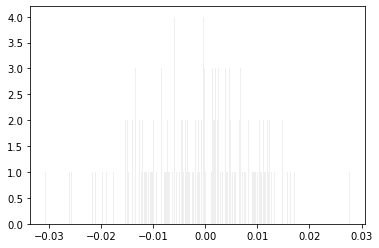

1.0


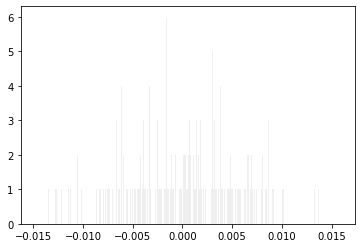

1.0


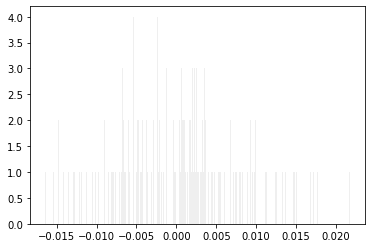

1.0


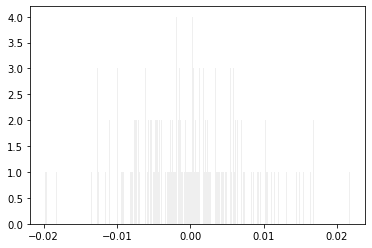

1.0


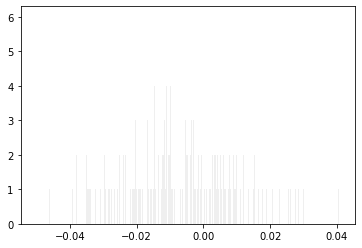

1.0


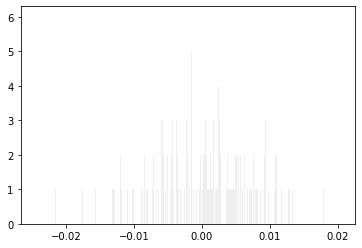

1.0


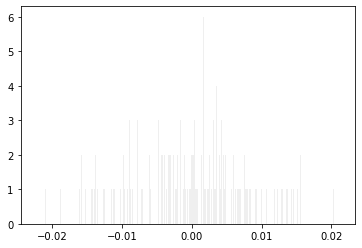

1.0


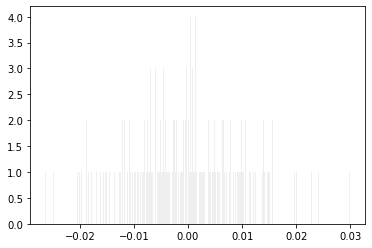

1.0


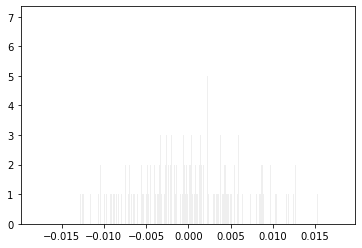

1.0


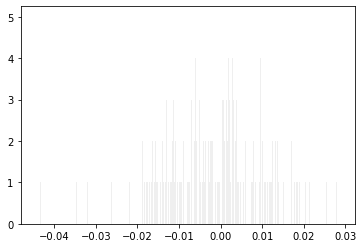

1.0


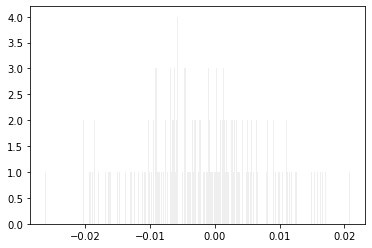

1.0


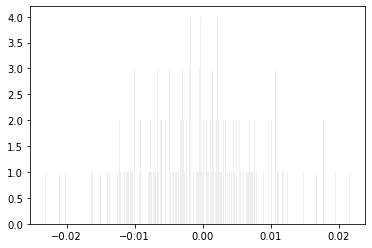

0.9999999999999999


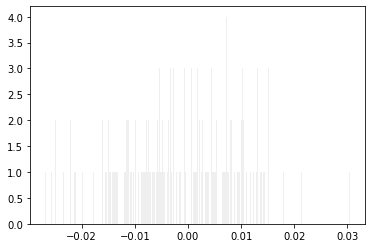

1.0


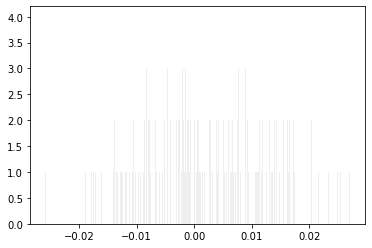

1.0


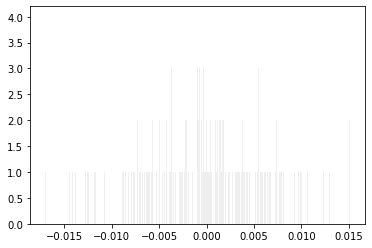

1.0


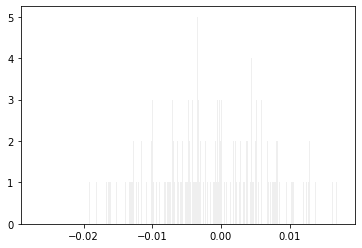

1.0


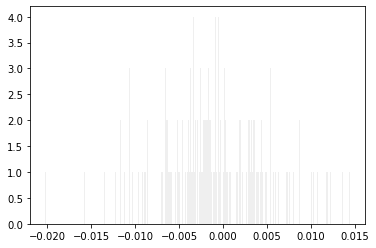

0.9999999999999999


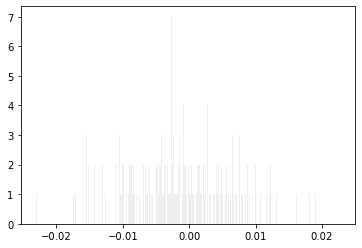

1.0


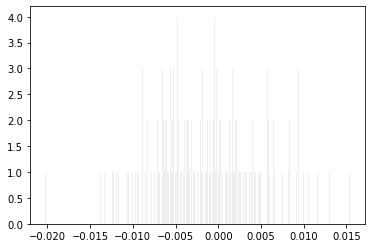

1.0


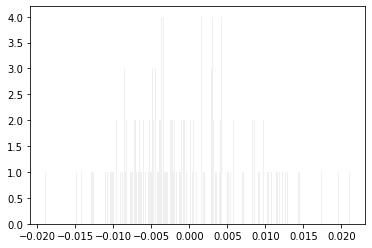

1.0


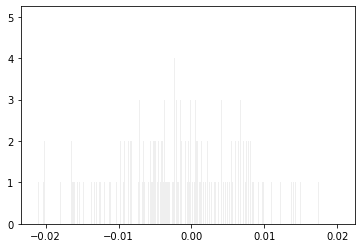

1.0


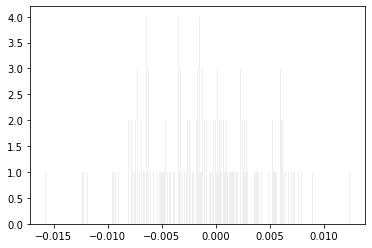

1.0


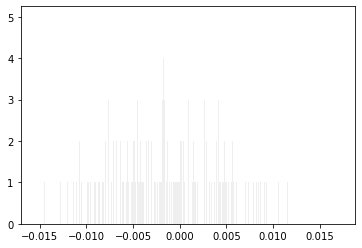

1.0


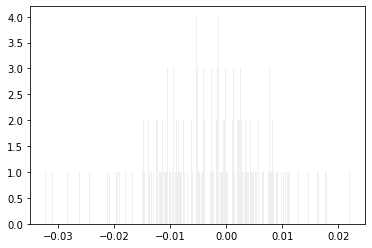

1.0


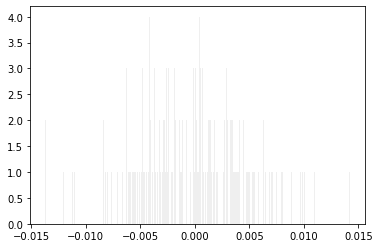

1.0


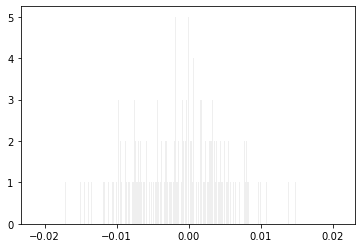

1.0


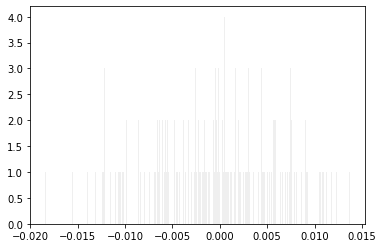

1.0


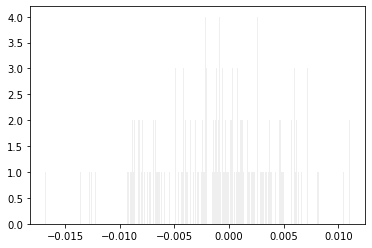

1.0


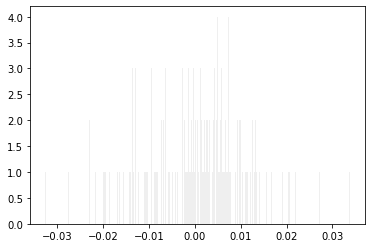

1.0


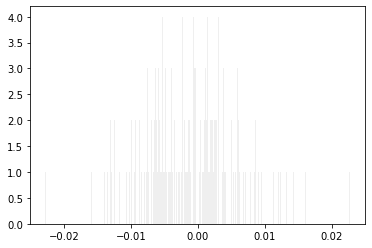

1.0


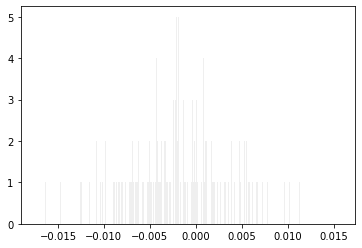

1.0


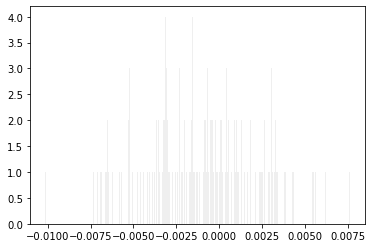

1.0


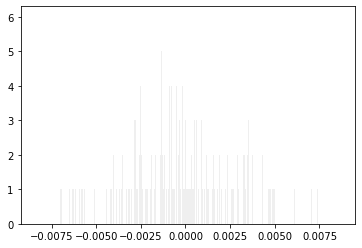

1.0


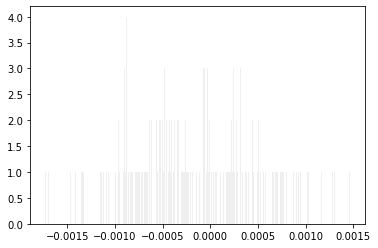

0.9999999999999999


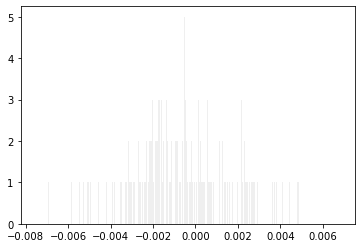

1.0


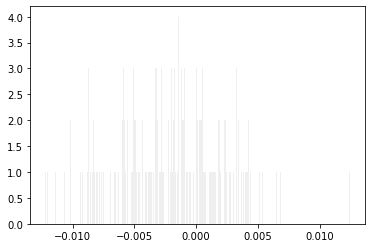

0.9999999999999999


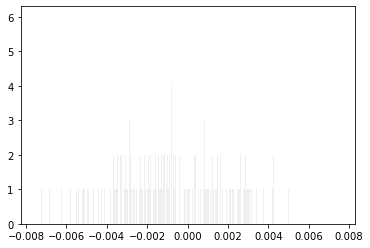

1.0


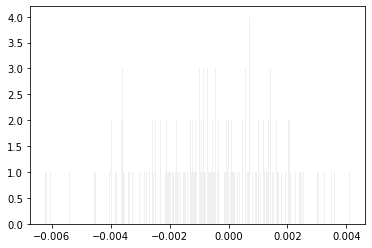

1.0


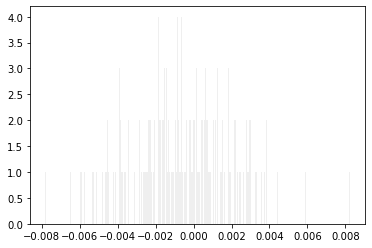

1.0


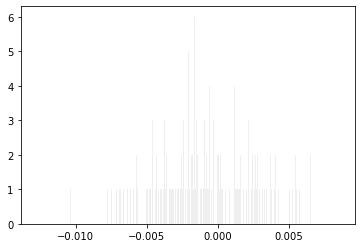

1.0


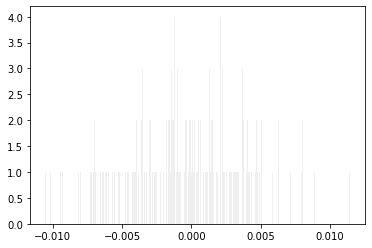

1.0


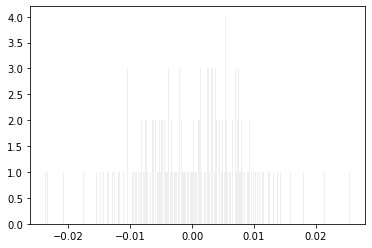

1.0


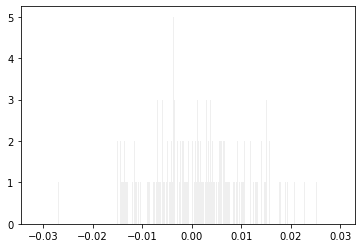

1.0


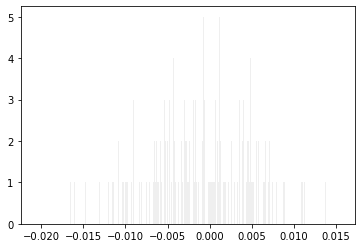

1.0


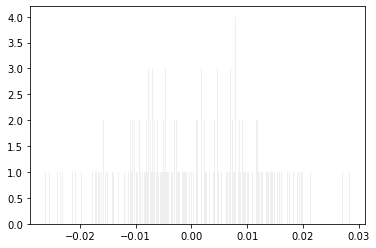

1.0


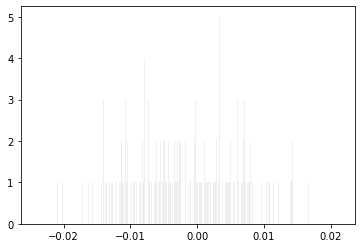

1.0


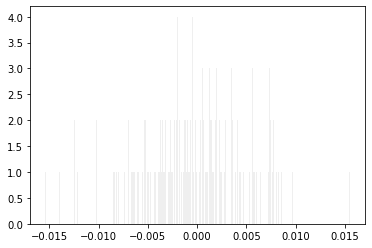

1.0


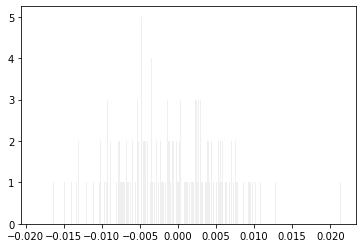

1.0


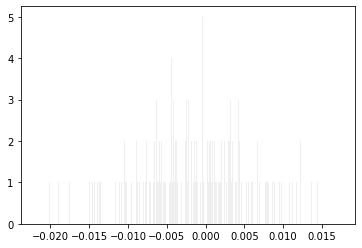

1.0


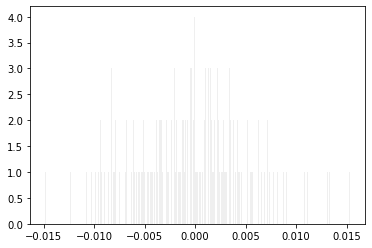

0.9999999999999999


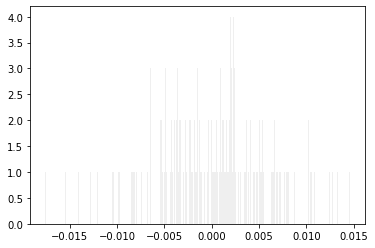

1.0


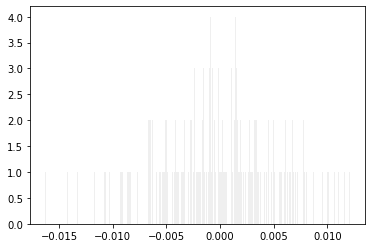

1.0


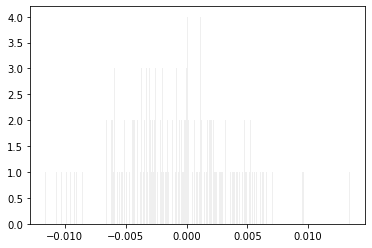

1.0


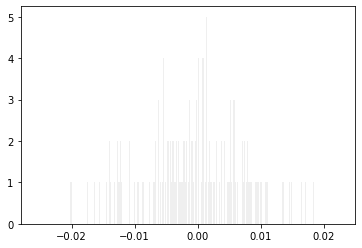

1.0


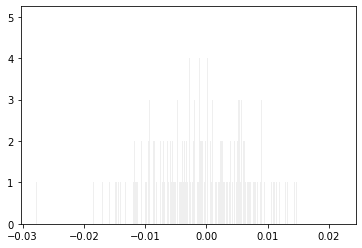

1.0


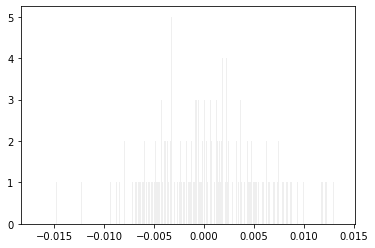

1.0


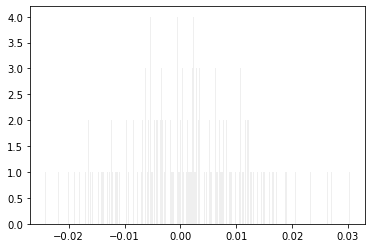

1.0


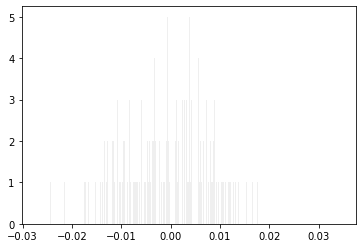

1.0


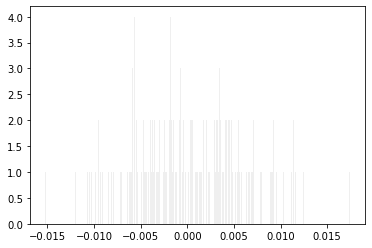

1.0


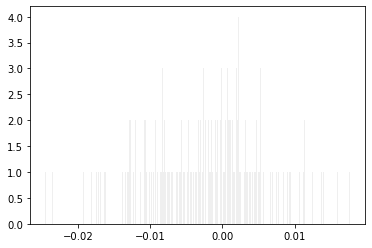

1.0


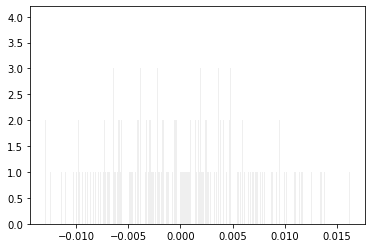

1.0


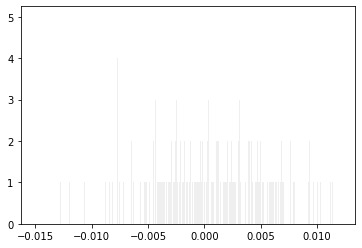

1.0


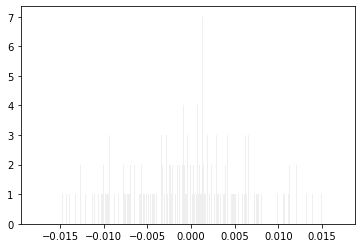

1.0


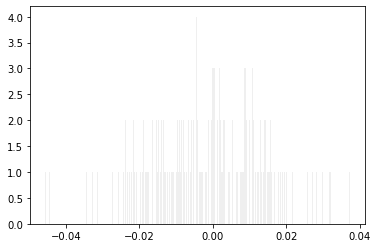

1.0


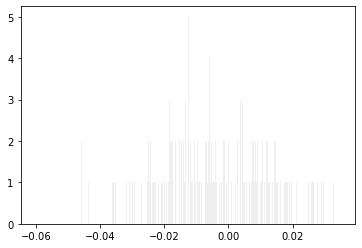

1.0000000000000002


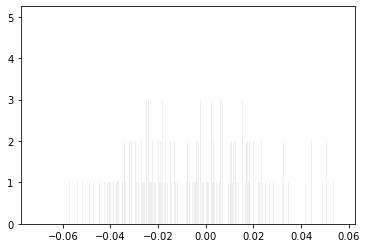

1.0


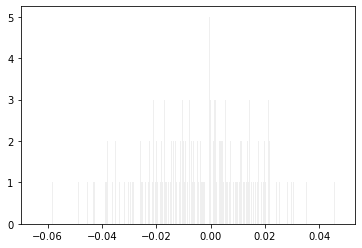

1.0


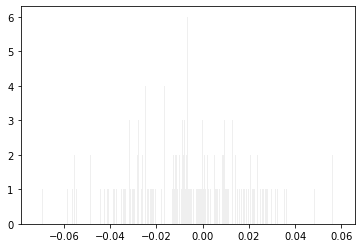

0.9999999999999999


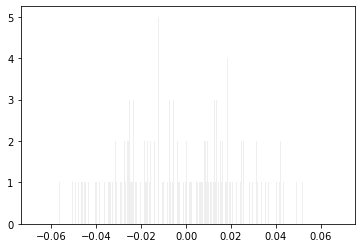

1.0


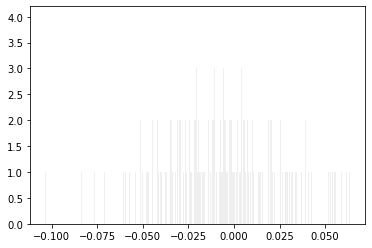

1.0


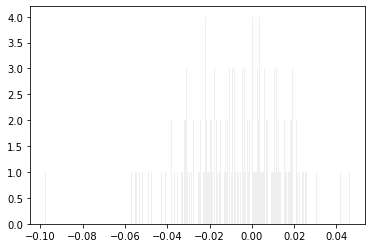

1.0


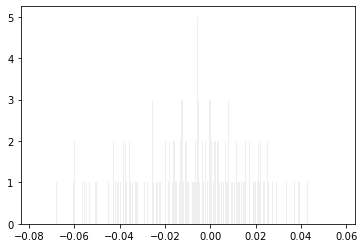

1.0


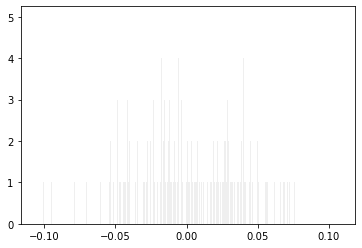

1.0


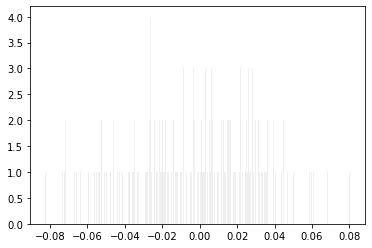

1.0
group_Yuan__10-16-2022_16:57:15.csv


In [1]:
from itertools import count
from mailbox import linesep
from turtle import color
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import math
from scipy.stats import lognorm, norm
import datetime


path = "/Users/10535/Data Analytics in Finance/"
a = pd.read_csv(path+'Expected_Return.csv')
b = pd.read_csv(path+'Variance_1.csv')
decision = pd.read_csv(path+'rolling_res_1016_revised.csv')

def calculate_pdf(samples,num_bins=500):
#send a series of normal distributed data [samples] with size
    samples = np.log(samples+1)
    mle, loc, scale =scipy.stats.lognorm.fit(samples)
    #get loc and sacle for cdf
    clr="#EFEFEF"
    counts,edges,patches=plt.hist(samples,bins=num_bins,color=clr)
    plt.show()
    #edges: size:bins, the height
    #counts: the interval's x value
    # print(loc,scale)
    centers=0.5*(edges[:-1]+edges[1:]) # change the frequency to probability density func
    cdf=scipy.stats.lognorm(mle,loc,scale).cdf(edges)

    # plt.bar(range(len(cdf)), cdf)
    # plt.show()
    # pdf=scipy.stats.norm.pdf(edges,loc=loc,scale=scale)
    prob=np.diff(cdf)#like pdf, smooth the curve，
    # plt.plot(centers,prob,'k-',linewidth=2,color='r')
    # plt.plot(centers,pdf[:-1],'k-',linewidth=2,color='b')
    # plt.show()
    return prob, centers, edges, loc, scale, cdf

def cal_overlap(edges1, cdf, interval):
    sum = 0
    prob_interval = [0,0,0,0]
    for i in range(4):
        for j in range(len(cdf)-1):
            if edges1[j]<interval[i] and edges1[j+1]>interval[i]:
                prob_interval[i]=cdf[j]
                continue
    prob_interval.append(cdf[-1])
    for i in range(1,5):
        prob_interval[5-i] = prob_interval[5-i] - prob_interval[4-i]
    
    return prob_interval


def rank_range(edges,cdf):
    sp = [0.2, 0.4, 0.6, 0.8]
    interval = []
    for tmp in sp:
        for i in range(len(cdf)-1):
            if cdf[i]<tmp and cdf[i+1]>tmp:
                interval.append(edges[i])
                break
    return interval


a = a.iloc[:,1].to_list()
b = b.iloc[:,1].to_list()
a1 = []
b1 = []
for i in b:
    b1.append(math.sqrt(i))

prob, centers, edges, loc, scale, cdf = calculate_pdf(np.array(a))


interval = rank_range(edges,cdf)

plt.plot(centers,prob,'k-',linewidth=2,color='r')
# # plt.show()
# # print(prob)


# interval = []
# for i in range(4):
#     interval.append(edges[l[i]])

def loop_for_110(mean, std):
    stock1 = np.random.normal(mean,std,size=250)
    prob1, centers1, edges1,loc, scale, cdf = calculate_pdf(stock1)
    return prob1, centers1, edges1, loc, scale, cdf
# # print(edges)
# for j in range(4):
#     plt.axvline(x = interval[j])
res = []
for i in range(110):
    prob1, centers1, edges1,loc1, scale1, cdf1 = loop_for_110(a[i],b1[i])
    prob_interval = cal_overlap(edges1,cdf1,interval)
    sum_of = sum(prob_interval)
    prob_interval = prob_interval/sum_of
    print(sum(prob_interval))
    res.append(prob_interval)
    # plt.plot(centers,prob,'k-',linewidth=2,color='r')
    # plt.plot(centers1,prob1,'k-',linewidth=2,color='b')
    # # for j in range(4):
    # #     plt.axvline(x = edges[l[j]])
    # plt.title(str(i)+'_'+str(port_expr.iloc[i,0]))
    # plt.show()
#     # plt.savefig(path+'{}.jpg'.format(port_expr.iloc[i,0]))


res = pd.DataFrame(res,columns=['rank1', 'rank2', 'rank3', 'rank4','rank5'])
res.insert(0,'id',decision.iloc[:,0])
res['decision'] = decision.iloc[:,1]
submission_time = datetime.datetime.now()
submission_time = submission_time.strftime('%m-%d-%Y_%H:%M:%S') # GMT time-zone
filename = 'group_Yuan__'+submission_time+'.csv'
print(filename)
res.to_csv('2.csv')

In [7]:
decision.iloc[:,0]

0          ABBV
1           ACN
2           AEP
3           AIZ
4          ALLE
         ...   
104     XRP-USD
105     SOL-USD
106    DOGE-USD
107     DOT-USD
108    AVAX-USD
Name: Unnamed: 0, Length: 109, dtype: object

In [15]:
res

,id,rank1,rank2,rank3,rank4,rank5,decision
0,ABBV,0.290669,0.061364,0.052927,0.063212,0.531829,0.001165
1,ACN,0.482091,0.043878,0.038513,0.046945,0.388573,-0.016126
2,AEP,0.332960,0.058977,0.049514,0.058686,0.499862,0.001457
3,AIZ,0.370889,0.058214,0.050469,0.059916,0.460512,-0.005402
4,ALLE,0.405008,0.050423,0.038158,0.050670,0.455741,-0.003841
...,...,...,...,...,...,...,...
105,SOL-USD,0.527177,0.009718,0.009695,0.014486,0.438925,0.020472
106,DOGE-USD,0.535917,0.012658,0.012606,0.016707,0.422113,0.028331
107,DOT-USD,0.582365,0.014975,0.009903,0.014719,0.378038,0.025273
108,AVAX-USD,0.514227,0.010143,0.010125,0.010099,0.455406,0.017607
